### Objective: 
#####                Predict a person's medical expenses based on features such as age, gender, BMI, number of children, discount eligibility, and region.

### Target Variable:
##### expenses

### ML Task Type: 
####              Regression, since expenses is a continuous numerical value.



# ---------------------------------

# Importing Libraries

In [146]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import PowerTransformer


# Loading dataset


In [147]:
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372


# Basic Data-Preprocessing steps


In [148]:
def getinfo(df):
    print("First 5 rows of the data:")
    display(df.sample(10))
    
    print("Shape of the data:")
    display(df.shape)
    
    print("Statistical description of the data")
    display(df.describe())
    
    print("Information of the data")
    display(df.info())
    
    print("Null Values in the data")
    display(df.isna().sum())

    print("Duplicated values are: ")
    df.duplicated().sum()
     

getinfo(df)    

First 5 rows of the data:


,age,gender,bmi,children,discount_eligibility,region,expenses,premium
92,59,male,29.8,3,yes,northeast,30184.94,603.6988
633,40,male,22.7,2,no,northeast,7173.36,143.4672
389,24,female,30.2,3,no,northwest,4618.08,46.1808
639,56,male,33.7,4,no,southeast,12949.16,258.9832
1033,18,male,21.6,0,yes,northeast,13747.87,137.4787
253,27,male,30.3,3,no,southwest,4260.74,42.6074
836,36,male,31.5,0,no,southwest,4402.23,88.0446
410,19,male,17.5,0,no,northwest,1621.34,16.2134
42,41,male,21.8,1,no,southeast,6272.48,125.4496
184,44,male,30.7,2,no,southeast,7731.43,154.6286


Shape of the data:


(1338, 8)

Statistical description of the data


,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


Information of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


None

Null Values in the data


age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64

Duplicated values are: 


In [149]:
df.isna().sum()   # 0 
df.isnull().sum()   # 0 
df.duplicated().sum() 

1

In [150]:
df.drop_duplicates(inplace=True)

In [151]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [152]:
df['age'].argmin()
df['age'].argmax()


62

In [153]:
len(df['premium'].unique())

1337

In [154]:
df['premium'].argmin()
df['premium'].argmax()

1240

In [155]:
for index, row in df.iterrows():
    age = row['age']
    if age < 13:
        df.loc[index, 'age_group'] = "Child"
    elif age < 20:
        df.loc[index, 'age_group'] = "Teen"
    elif age < 60:
        df.loc[index, 'age_group'] = "Adult"
    else:
        df.loc[index, 'age_group'] = "Senior"



def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 35:
        return 'Obese Class 1'
    elif bmi < 40:
        return 'Obese Class 2'
    else:
        return 'Obese Class 3'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)


In [156]:
df=df.drop('age', axis=1)
df=df.drop('premium', axis=1)
df = df.drop('bmi' , axis=1)


In [157]:
df.sample(30)

,gender,children,discount_eligibility,region,expenses,age_group,bmi_category
814,male,2,no,southeast,5584.31,Adult,Obese Class 1
755,male,2,no,northeast,5031.27,Adult,Overweight
576,male,0,no,southeast,1665.00,Adult,Overweight
245,male,0,no,northwest,24476.48,Adult,Obese Class 1
374,male,0,no,southeast,1391.53,Adult,Obese Class 1
1306,female,0,yes,northeast,16115.30,Adult,Normal
34,male,1,yes,southwest,51194.56,Adult,Obese Class 2
1152,female,3,yes,southeast,40941.29,Adult,Obese Class 1
1317,male,0,no,southeast,1163.46,Teen,Obese Class 3
140,male,2,no,northeast,27375.90,Adult,Normal


# Detecting and removing Outliers

<Axes: xlabel='expenses', ylabel='Count'>

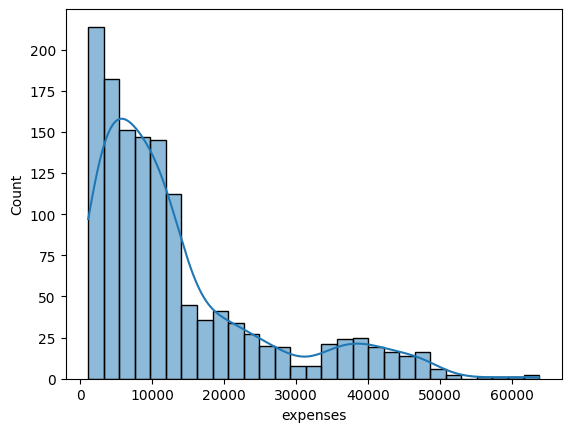

In [158]:
sns.histplot(df['expenses'], kde=True)

<Axes: ylabel='expenses'>

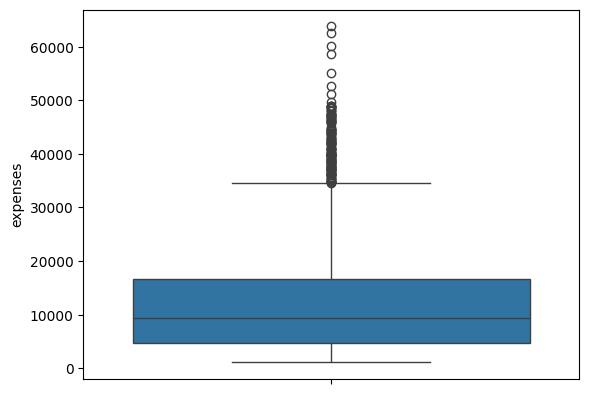

In [159]:
sns.boxplot(df['expenses'])

In [160]:
# df= df[df['expenses']<=49500]

In [161]:
# sns.boxplot(df['expenses'])

In [162]:
# Q1 = df['expenses'].quantile(0.25)
# Q3 = df['expenses'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df['expenses'] = df['expenses'].clip(lower=lower_bound, upper=upper_bound)


In [163]:
# df.shape

In [164]:
df['expenses'].skew()

1.5153909165486397

In [165]:
# pt = PowerTransformer(method='yeo-johnson')
# df['expenses'] = pt.fit_transform(df[['expenses']])

# Encoding Categorical data using one-hot-encoding

In [166]:

# Assuming df is your DataFrame from the previous context
# Add new features
def create_new_features(df):
    # 1. Family Size Indicator
    df['family_size'] = np.where(df['children'] > 0, 'Family', 'Single')

    # 2. Region-Gender Interaction
    df['region_gender'] = df['region'] + '_' + df['gender']

    # 3. Age Group-BMI Category Interaction
    df['age_bmi'] = df['age_group'] + '_' + df['bmi_category']

    # 4. Discount Eligibility with Children
    df['discount_with_children'] = np.where(
        (df['discount_eligibility'] == 'no') & (df['children'] == 0), 'No Discount, No Children',
        np.where((df['discount_eligibility'] == 'no') & (df['children'] > 0), 'No Discount, With Children',
                 np.where((df['discount_eligibility'] == 'yes') & (df['children'] == 0), 'Discount, No Children',
                          'Discount, With Children'))
    )

    # 7. BMI Risk Level
    bmi_risk_map = {
        'Underweight': 'Low', 'Normal': 'Low',
        'Overweight': 'Moderate',
        'Obese Class 1': 'High', 'Obese Class 2': 'High', 'Obese Class 3': 'High'
    }
    df['bmi_risk'] = df['bmi_category'].map(bmi_risk_map)

    # Remove features that cause data leakage
    df.drop(['expense_per_child', 'region_exp_quartile'], axis=1, inplace=True, errors='ignore')

    return df

# Apply the function to the DataFrame
df = create_new_features(df)

# Optional: Display the first few rows to verify new features
print(df[['gender', 'children', 'discount_eligibility', 'region', 'expenses', 'age_group', 
          'bmi_category', 'family_size', 'region_gender', 'age_bmi', 'discount_with_children', 
          'bmi_risk']].head())

# Prepare data for modeling (e.g., one-hot encoding for categorical variables)
df_encoded = pd.get_dummies(df.drop('expenses', axis=1), drop_first=True)
X = df_encoded
y = df['expenses']

   gender  children discount_eligibility     region  expenses age_group  \
0  female         0                  yes  southwest  16884.92      Teen   
1    male         1                   no  southeast   1725.55      Teen   
2    male         3                   no  southeast   4449.46     Adult   
3    male         0                   no  northwest  21984.47     Adult   
4    male         0                   no  northwest   3866.86     Adult   

    bmi_category family_size     region_gender              age_bmi  \
0     Overweight      Single  southwest_female      Teen_Overweight   
1  Obese Class 1      Family    southeast_male   Teen_Obese Class 1   
2  Obese Class 1      Family    southeast_male  Adult_Obese Class 1   
3         Normal      Single    northwest_male         Adult_Normal   
4     Overweight      Single    northwest_male     Adult_Overweight   

       discount_with_children  bmi_risk  
0       Discount, No Children  Moderate  
1  No Discount, With Children      Hig

In [167]:
df.head()

,gender,children,discount_eligibility,region,expenses,age_group,bmi_category,family_size,region_gender,age_bmi,discount_with_children,bmi_risk
0,female,0,yes,southwest,16884.92,Teen,Overweight,Single,southwest_female,Teen_Overweight,"Discount, No Children",Moderate
1,male,1,no,southeast,1725.55,Teen,Obese Class 1,Family,southeast_male,Teen_Obese Class 1,"No Discount, With Children",High
2,male,3,no,southeast,4449.46,Adult,Obese Class 1,Family,southeast_male,Adult_Obese Class 1,"No Discount, With Children",High
3,male,0,no,northwest,21984.47,Adult,Normal,Single,northwest_male,Adult_Normal,"No Discount, No Children",Low
4,male,0,no,northwest,3866.86,Adult,Overweight,Single,northwest_male,Adult_Overweight,"No Discount, No Children",Moderate


In [168]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [169]:
# import pandas as pd

# # List of columns to one-hot encode
# categorical_cols = ['gender', 'discount_eligibility', 'region', 'age_group', 'bmi_category']

# # One-hot encode categorical columns
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True).astype(int)




In [170]:
df.columns

Index(['gender', 'children', 'discount_eligibility', 'region', 'expenses',
       'age_group', 'bmi_category', 'family_size', 'region_gender', 'age_bmi',
       'discount_with_children', 'bmi_risk'],
      dtype='object')

In [171]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1337 non-null   object 
 1   children                1337 non-null   int64  
 2   discount_eligibility    1337 non-null   object 
 3   region                  1337 non-null   object 
 4   expenses                1337 non-null   float64
 5   age_group               1337 non-null   object 
 6   bmi_category            1337 non-null   object 
 7   family_size             1337 non-null   object 
 8   region_gender           1337 non-null   object 
 9   age_bmi                 1337 non-null   object 
 10  discount_with_children  1337 non-null   object 
 11  bmi_risk                1337 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 168.1+ KB


In [172]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'female'

# Testing all important models on cleaned data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    max_error
)
from sklearn.model_selection import cross_val_score,train_test_split

def check_all_regressors(X_train, X_test, y_train, y_test, X_full, y_full):
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.svm import SVR
    from sklearn.neighbors import KNeighborsRegressor
    from xgboost import XGBRegressor

    models = {
        'Linear Regression': LinearRegression(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'Support Vector Regressor': SVR(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'XGBoost': XGBRegressor()
    }

    results = []

    n = len(X_test)
    p = X_test.shape[1]  

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        mse = mean_squared_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        adjusted_r2 = 1 - ((1 - test_r2) * (n - 1) / (n - p - 1))
        cv_r2 = cross_val_score(model, X_full, y_full, cv=5, scoring='r2').mean()

        results.append({
            'Model': name,
            'Train R²': round(train_r2, 3),
            'Test R²': round(test_r2, 3),
            'Adjusted R²': round(adjusted_r2, 3),
            'MAE': round(mae, 2),
            'MSE': round(mse, 2),
            'RMSE': round(rmse, 2),
         
            'CV R² Mean': round(cv_r2, 3)
        })

    results_df = pd.DataFrame(results)
    display(results_df)


In [ ]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

check_all_regressors(X_train, X_test, y_train, y_test, X, y)


,Model,Train R²,Test R²,Adjusted R²,MAE,MSE,RMSE,CV R² Mean
0,Linear Regression,0.699,0.746,0.697,5165.45,4.663631e+07,6829.08,0.704
1,K-Nearest Neighbors,0.708,0.522,0.430,6027.40,8.791405e+07,9376.25,0.559
2,Decision Tree,0.868,0.821,0.787,3865.45,3.285137e+07,5731.61,0.748
3,Random Forest,0.862,0.840,0.809,3665.28,2.944851e+07,5426.65,0.780
4,Support Vector Regressor,-0.099,-0.132,-0.350,9285.18,2.080799e+08,14424.98,-0.103
5,Gradient Boosting,0.823,0.851,0.823,3602.96,2.729368e+07,5224.34,0.809
6,AdaBoost,0.744,0.809,0.772,4697.32,3.514649e+07,5928.45,0.726
7,XGBoost,0.866,0.827,0.794,3919.65,3.172249e+07,5632.27,0.767


# Hypermeter Tunning using RandomSearchCV 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error
from scipy.stats import randint, uniform


param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.001, 0.3),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8]
}


gb = GradientBoostingRegressor(random_state=42)


random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


n = len(y_test)
p = X_test.shape[1]
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
adjusted_r2 = 1 - ((1 - test_r2) * (n - 1) / (n - p - 1))
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_test_pred)
maxerr = max_error(y_test, y_test_pred)
cv_score = random_search.best_score_

# Results table
results = {
    'Metric': [
        'Train R²', 'Test R²', 'Adjusted Test R²',
        'MAE', 'MSE', 'RMSE', 'MAPE (%)', 'Max Error', 'CV R² (5-Fold)'
    ],
    'Score': [
        round(train_r2, 3), round(test_r2, 3), round(adjusted_r2, 3),
        round(mae, 2), round(mse, 2), round(rmse, 2), round(mape * 100, 2),
        round(maxerr, 2), round(cv_score, 3)
    ]
}

results_df = pd.DataFrame(results)
print("🔧 Best Hyperparameters:\n", random_search.best_params_)
display(results_df)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 